In [60]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# from solutions_multiv import encodings_solution_1, encodings_solution_2

In this notebook, you'll be working with the Pokémon dataset from the univariate plots lesson.

In [61]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [62]:
pokemon.shape

(807, 14)

**Task 1**: To start, let's look at the relationship between the Pokémon combat statistics of Speed, Defense, and Special-Defense. If a Pokémon has higher defensive statistics, does it necessarily sacrifice speed? Create a single plot to depict this relationship.

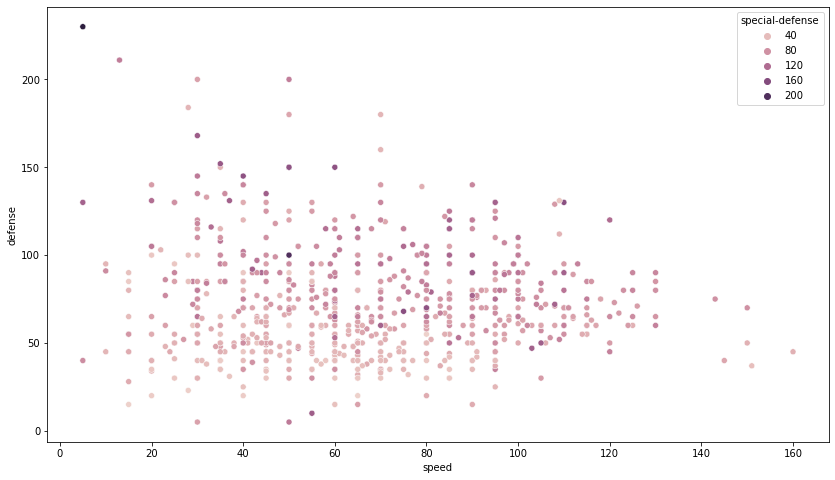

In [63]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 8
sb.scatterplot(data = pokemon, x = 'speed', y = 'defense', hue = 'special-defense');

To complete the second task, we need to first reshape the dataset so that all Pokémon types are recorded in a single column. This will add duplicates of Pokémon with two types, which is fine for the task to be performed.

In [64]:
type_cols = ['type_1','type_2']
non_type_cols = pokemon.columns.difference(type_cols)
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
0,49,64,49,1,0.7,45,1,65,65,bulbasaur,45,6.9,type_1,grass
1,62,142,63,1,1.0,60,2,80,80,ivysaur,60,13.0,type_1,grass
2,82,236,83,1,2.0,80,3,100,100,venusaur,80,100.0,type_1,grass
3,52,62,43,1,0.6,39,4,60,50,charmander,65,8.5,type_1,fire
4,64,142,58,1,1.1,58,5,80,65,charmeleon,80,19.0,type_1,fire


**Task 2**: How do weights and heights compare between Fairy type Pokémon and Dragon type Pokémon? You may want to subset your dataframe before proceeding with the plotting code. **Hint**: If you remember from the univariate plots lesson, one of your axis variables may need to be transformed. If you plan on using FacetGrid, its `.set()` method will be vital for adjusting the axis scaling and tick marks. Check the [last example in the Seaborn documentation](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) for an example of how the `.set()` method is used, and the [matplotlib documentation of the Axes class](https://matplotlib.org/api/axes_api.html) for properties that you might want to set.

In [65]:
pkmn_types['type'].value_counts()

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [66]:
df = pkmn_types[(pkmn_types['type'] == 'fairy') | (pkmn_types['type'] == 'dragon')]

In [67]:
df.type.value_counts()

fairy     47
dragon    45
Name: type, dtype: int64

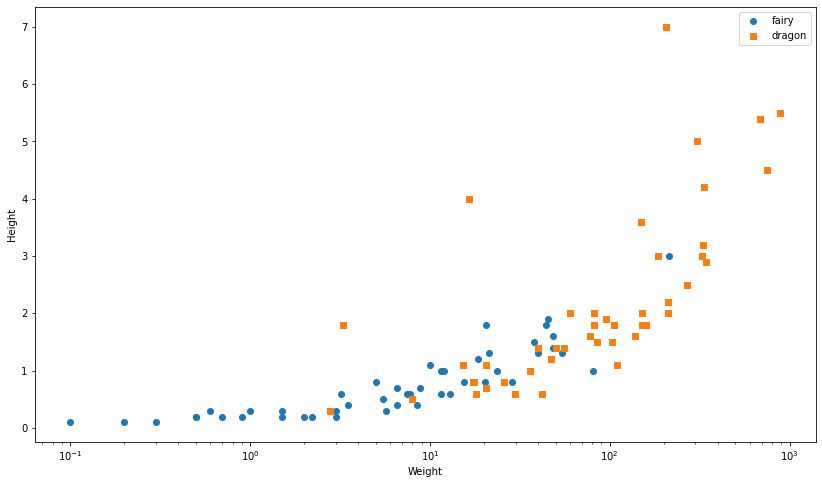

In [68]:
markers = [['fairy', 'o'] , ['dragon', 's']]

for i, marker in markers:
    df_new = df[df['type'] == i]
    plt.scatter(data = df_new, x = 'weight', y = 'height', marker = marker)
    plt.xscale('log')
    plt.legend(['fairy','dragon'])
    plt.xlabel('Weight')
    plt.ylabel('Height')

## 9-2 Adapted_Plot_Practice

In [69]:
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


**Task 1**: Plot the city ('city') vs. highway ('highway') fuel efficiencies (both in mpg) for each vehicle class ('VClass'). Don't forget that vehicle class is an ordinal variable with levels {Minicompact Cars, Subcompact Cars, Compact Cars, Midsize Cars, Large Cars}.

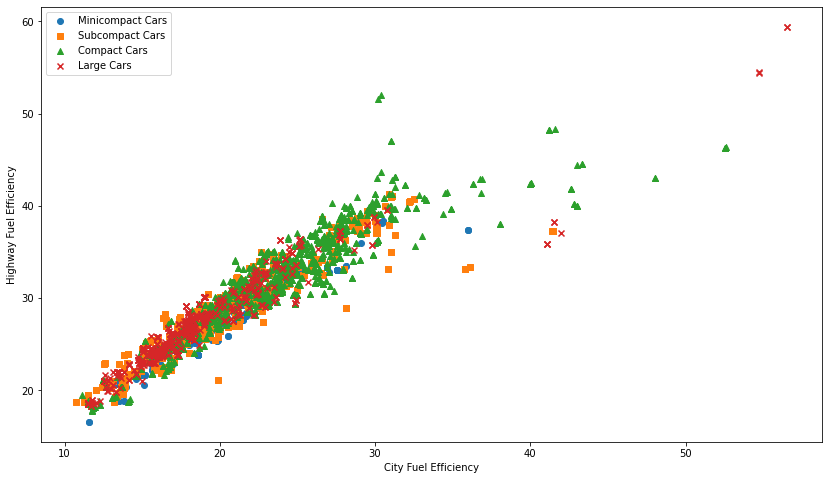

In [70]:
markers = [['Minicompact Cars', 'o'] , ['Subcompact Cars', 's'], ['Compact Cars', '^'], ['Large Cars', 'x']]

for i, marker in markers:
    fuel_econ_new = fuel_econ[fuel_econ['VClass'] == i]
    plt.scatter(data = fuel_econ_new, x = 'city', y = 'highway', marker = marker)
    plt.legend(['Minicompact Cars','Subcompact Cars', 'Compact Cars', 'Large Cars'])
    plt.xlabel('City Fuel Efficiency')
    plt.ylabel('Highway Fuel Efficiency')

### Another Point of View Approach ( using medians )

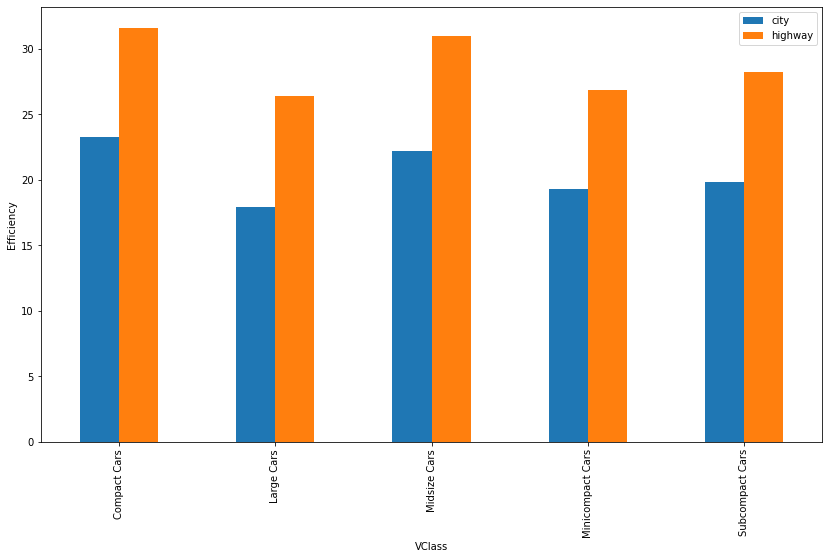

In [71]:
fuel_econ.groupby('VClass')[['city', 'highway']].median().plot(kind = 'bar', ylabel = 'Efficiency');

**Task 2**: Plot the relationship between engine size ('displ', in liters), vehicle class, and fuel type ('fuelType'). For the lattermost feature, focus only on Premium Gasoline and Regular Gasoline cars. What kind of relationships can you spot in this plot?

In [72]:
fuel_econ['fuelType'].value_counts()

Premium Gasoline     2302
Regular Gasoline     1521
Diesel                 80
Midgrade Gasoline      23
Natural Gas             3
Name: fuelType, dtype: int64

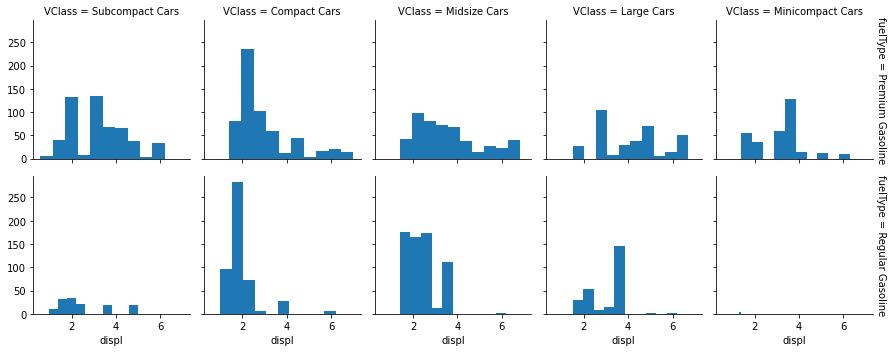

In [73]:
fuel_econ_new = fuel_econ[(fuel_econ['fuelType'] == 'Premium Gasoline') | (fuel_econ['fuelType'] == 'Regular Gasoline')]
g = sb.FacetGrid(data = fuel_econ_new, col = 'VClass', row = 'fuelType', height = 2.5, margin_titles = True)
g.map(plt.hist, 'displ');

## 13-2 Additional_Plot_Practice

**Task 1**: Practice creating a plot matrix, by depicting the relationship between five numeric variables in the fuel efficiency dataset: 'displ', 'co2', 'city', 'highway', and 'comb'. Do you see any interesting relationships that weren't highlighted previously?

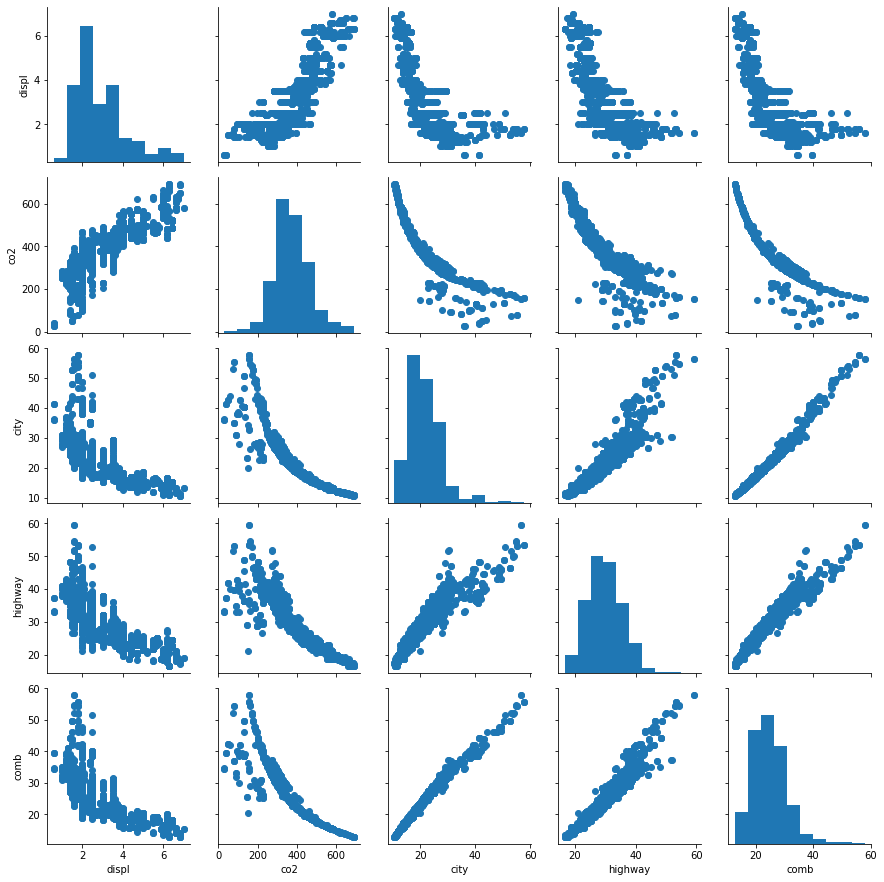

In [74]:
g = sb.PairGrid(data = fuel_econ, vars = ['displ', 'co2', 'city', 'highway', 'comb'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

**Task 2**: The output of the preceding task pointed out a potentially interesting relationship between co2 emissions and overall fuel efficiency. Engineer a new variable that depicts CO2 emissions as a function of gallons of gas (g / gal). (The 'co2' variable is in units of g / mi, and the 'comb' variable is in units of mi / gal.) Then, plot this new emissions variable against engine size ('displ') and fuel type ('fuelType'). For this task, compare not just Premium Gasoline and Regular Gasoline, but also Diesel fuel.

In [75]:
fuel_econ['co2_emissions'] = fuel_econ['co2'] / fuel_econ['comb']

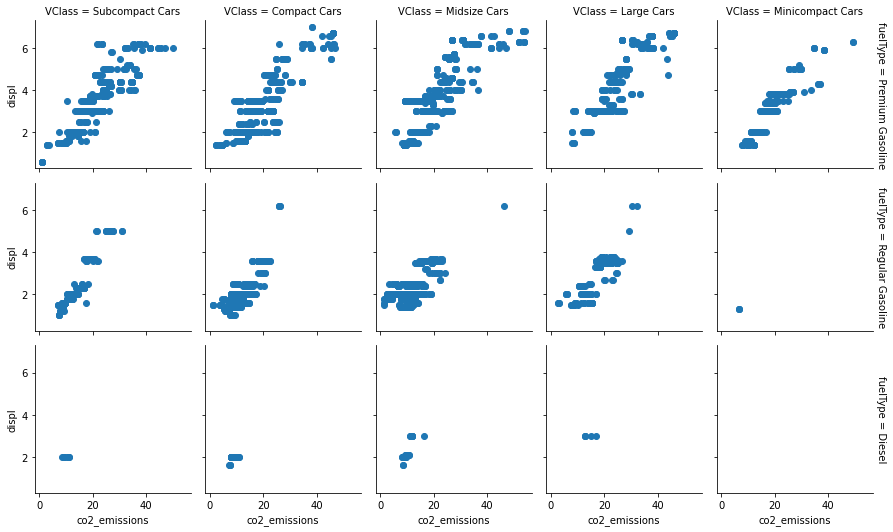

In [76]:
fuel_econ_new = fuel_econ[(fuel_econ['fuelType'] == 'Premium Gasoline') | (fuel_econ['fuelType'] == 'Regular Gasoline') | (fuel_econ['fuelType'] == 'Diesel')]
g = sb.FacetGrid(data = fuel_econ_new, col = 'VClass', row = 'fuelType', height = 2.5, margin_titles = True)
g.map(plt.scatter, 'co2_emissions', 'displ');

## 5 -2 Polishing_Plots_Practice

**Task**: Perform polishing and cleaning steps for the following multivariate plot, where the relationship between height and weight are depicted for the Fairy and Dragon Pokémon types. You'll need to do more than just add meaningful labels and titles to the plot. Pay attention to the interpretability of tick marks and the ability to associate each point to a type of Pokemon.

For reference, height is in terms of meters and weight is in terms of kilograms. One other thing you might try is to change the colors mapped to each type to match those given by the game series. Fairy is depicted with a light pink (hex code #ee99ac) while Dragon is associated with a medium purple (hex code #7038f8). (Type colors taken from [Pokémon Wiki Bulbapedia](https://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates).)

In [77]:
# data processing: isolate only fairy and dragon type Pokemon
type_cols = ['type_1','type_2']
non_type_cols = pokemon.columns.difference(type_cols)
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, 
                          var_name = 'type_level', value_name = 'type').dropna()

pokemon_sub = pkmn_types.loc[pkmn_types['type'].isin(['fairy','dragon'])]

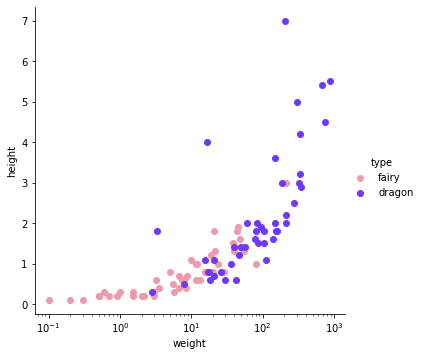

In [78]:
rcParams['figure.figsize'] = 14, 8
g = sb.FacetGrid(data = pokemon_sub, hue = 'type', height = 5, palette = ['#ee99ac', '#7038f8'])
g.map(plt.scatter, 'weight','height')
g.set(xscale = 'log')
g.add_legend();